# PRCP-1021-InsCostPred

## Linear Regression Model 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\DATA SCIENCE - Datamites\Projects\Data\Reg-insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## EDA

## univariate Analysis - single feature

<AxesSubplot:xlabel='age', ylabel='Count'>

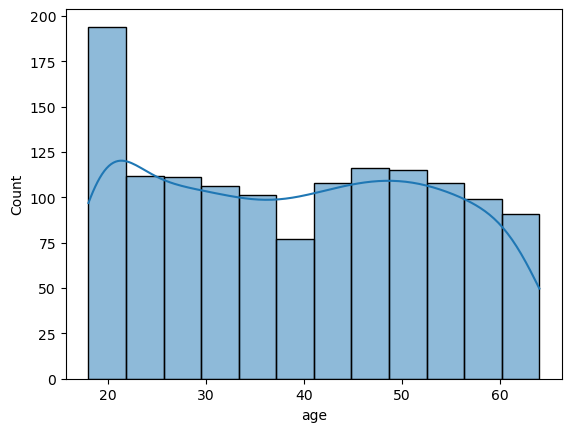

In [8]:
sns.histplot(x='age',data=data, kde=True)

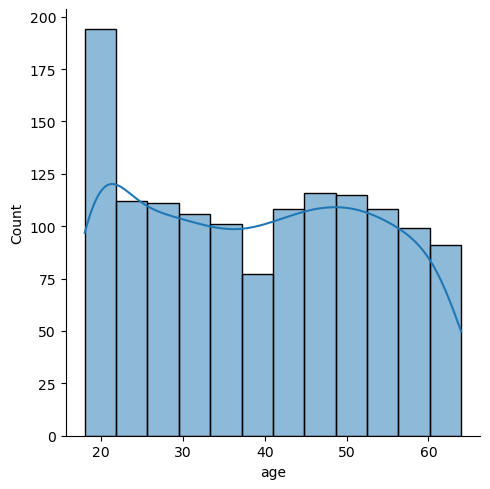

In [9]:
sns.displot(x='age',data=data, kde=True)
plt.show()

Insight 
- The x-axis ranges from 20 to 70, it indicates that the dataset contains individuals with ages between 20 and 70 years.
- No significant skewness and ages more or less evenly distributed

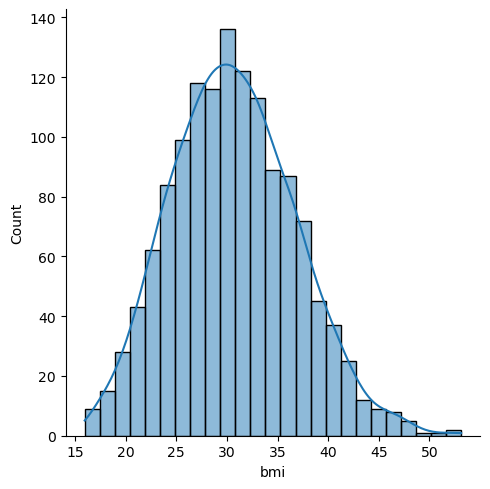

In [10]:
sns.displot(x='bmi',data=data, kde=True)
plt.show()

In [11]:
# Calculate the skewness of the "bmi" feature
bmi_skewness = data['bmi'].skew()

print("Skewness of BMI feature:", bmi_skewness)

Skewness of BMI feature: 0.2840471105987448


**Insight**
- BMI is normal distribution (bell-shaped curve) 
- The x-axis ranges from 20 to 50, it indicates that the dataset contains individuals with BMI values between 20 and 50.
- The distribution is approximately symmetric (no significant skewness).

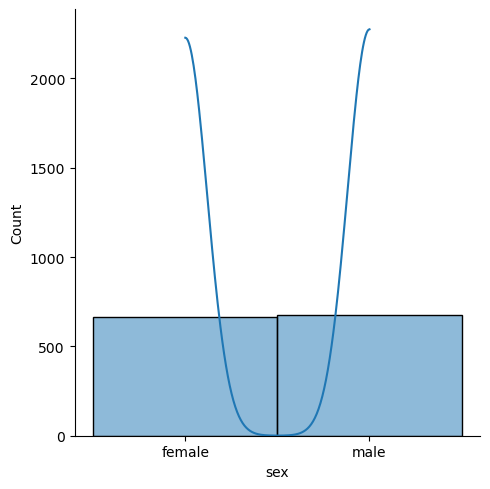

In [252]:
sns.displot(x='sex',data=data, kde=True)
plt.show()

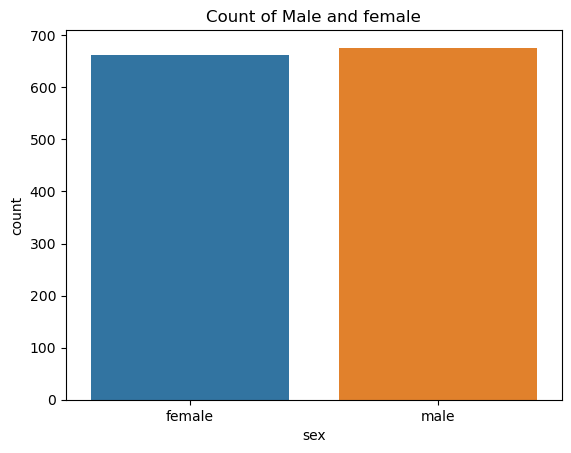

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the "sex" feature
sns.countplot(x='sex', data=data)
plt.title("Count of Male and female")
plt.show()

**Frequency Calculation**

In [253]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('insurance_cost_prediction.csv')

# Calculate the frequency count of each category in the "sex" feature
sex_counts = data['sex'].value_counts()

print("Frequency count of each category in the 'sex' feature:\n", sex_counts)

Frequency count of each category in the 'sex' feature:
 male      676
female    662
Name: sex, dtype: int64


**Insight**
- From the output, you can see that there are 676 male individuals and 662 female individuals in the dataset.

- since "sex" is a categorical feature, the concept of skewness does not apply.

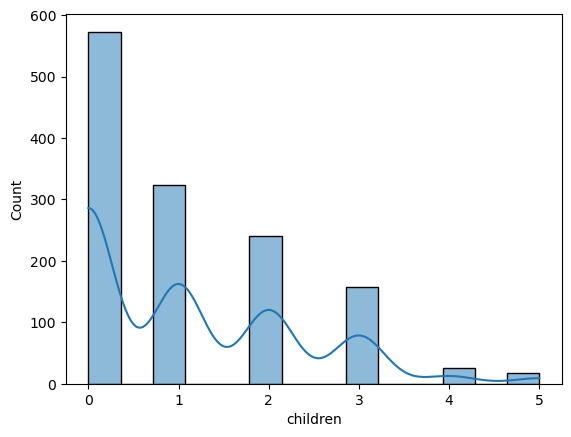

In [243]:
sns.histplot(x='children',data=data, kde=True)
plt.show()

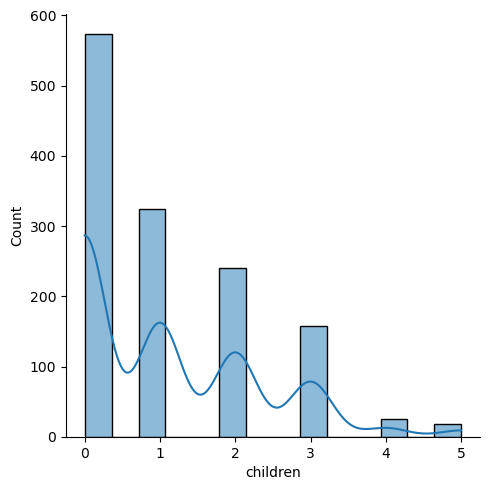

In [11]:
sns.displot(x='children',data=data, kde=True)
plt.show()

In [256]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('insurance_cost_prediction.csv')

# Calculate the frequency count of each category in the "sex" feature
children_counts = data['children'].value_counts()

print("Frequency count of each category in the 'children' feature:\n", children_counts)

Frequency count of each category in the 'children' feature:
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


**Insight**
- The maximum number of children observed in a family is 5. Specifically, there are 18 families with 5 children each.
- In the Insurance Cost Prediction dataset, a total of 574 families have no children, meaning they do not have any dependent children included in their insurance policy.

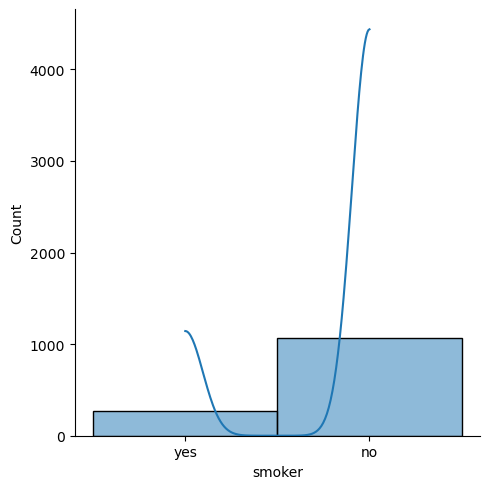

In [12]:
sns.displot(x='smoker',data=data, kde=True)
plt.show()

In [257]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('insurance_cost_prediction.csv')

# Calculate the frequency count of each category in the "sex" feature
smoker_counts = data['smoker'].value_counts()

print("Frequency count of each category in the 'smoker' feature:\n", smoker_counts)

Frequency count of each category in the 'smoker' feature:
 no     1064
yes     274
Name: smoker, dtype: int64


**Insights**
- non-smokers in our sample are higher than smokers by a high margin

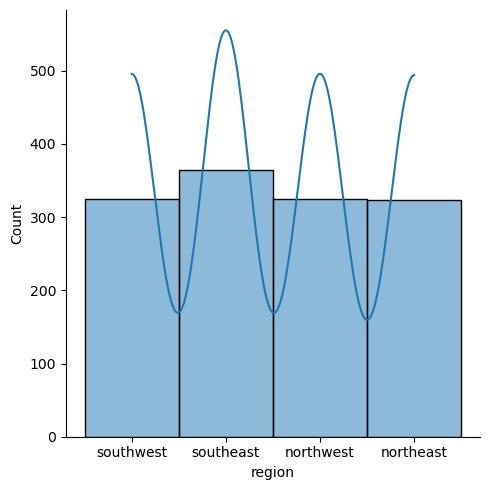

In [13]:
sns.displot(x='region',data=data, kde=True)
plt.show()

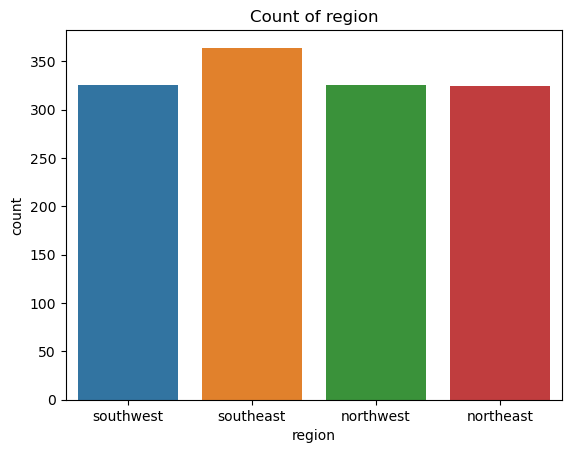

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the "smoker" feature
sns.countplot(x='region', data=data)
plt.title("Count of region")
plt.show()

In [261]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('insurance_cost_prediction.csv')

# Calculate the frequency count of each category in the "region" feature
region_counts = data['region'].value_counts()

print("Frequency count of each category in the 'region' feature:\n", region_counts)

Frequency count of each category in the 'region' feature:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


**Insight**
- The distribution of individuals across regions gives an idea of the geographic spread of the insured population
- The high count in the "southeast" region  indicates that more individuals from this region have participated in the insurance program.
- The "southeast" region has the highest number of individuals (364), while the other three regions, "northwest," "southwest," and "northeast," have a similar count (around 324-325 each).

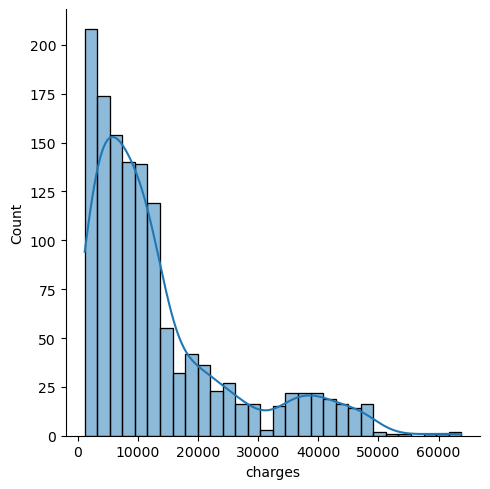

In [14]:
sns.displot(x='charges',data=data, kde=True)
plt.show()

In [262]:
# Calculate the skewness of the "bmi" feature
charges_skewness = data['charges'].skew()

print("Skewness of charges feature:", charges_skewness)

Skewness of charges feature: 1.5158796580240388


**Insight**
- In this case, the right-skewed distribution suggests that most individuals have relatively lower charges, while a smaller proportion of individuals may have significantly higher charges.

## Bivariate Analysis

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='age', ylabel='charges'>

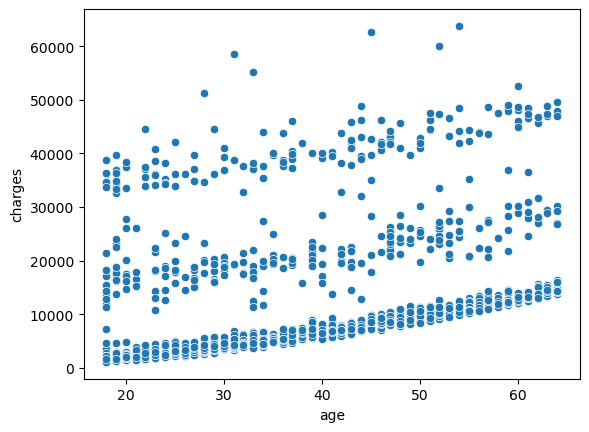

In [16]:
sns.scatterplot(x='age',y='charges', data=data)

**Insight**
- insurance charges increasing as individuals get older.

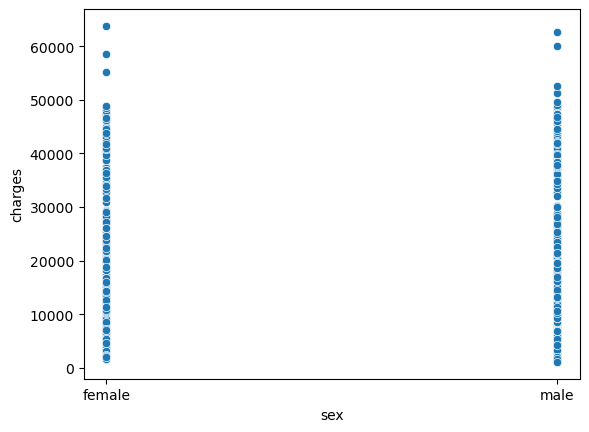

In [8]:
sns.scatterplot(x='sex',y='charges', data=data)
plt.show()

**Insight**
-  max charge for the male gender is higher than that of female

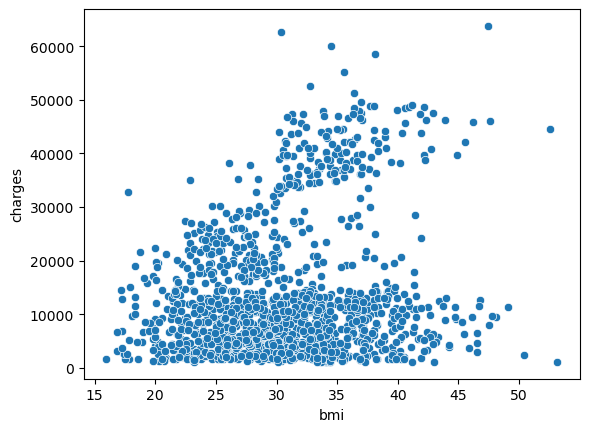

In [18]:
sns.scatterplot(x='bmi',y='charges', data=data)
plt.show()

**Insight**
- those with a BMI of 30 to 40 (median), may seem to be paying a higher charge than the rest

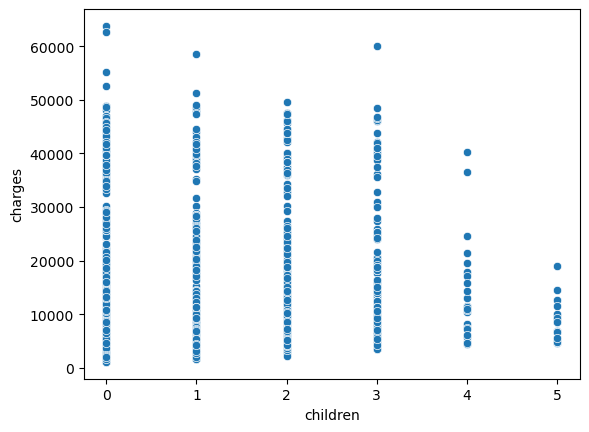

In [19]:
sns.scatterplot(x='children',y='charges', data=data)
plt.show()

**Insight**
- from the scatter plot it is seen that the individuals with a larger number of children are charged less v/s those with no or children

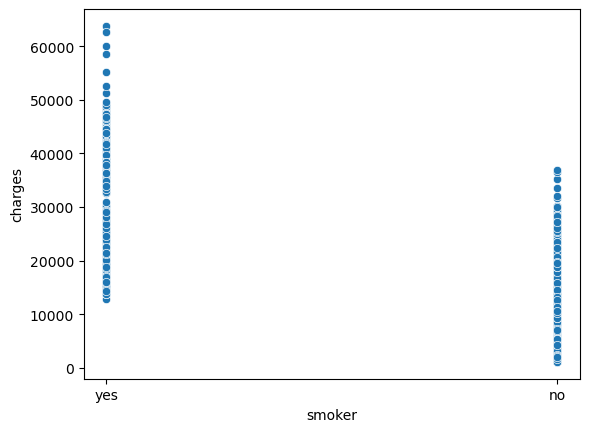

In [20]:
sns.scatterplot(x='smoker',y='charges', data=data)
plt.show()

**Insight**
- there is a visible difference seen in the premium charged for smokers v/s non smokers, this could a result of smokers to be at a higher health risk
- Hence being charged more

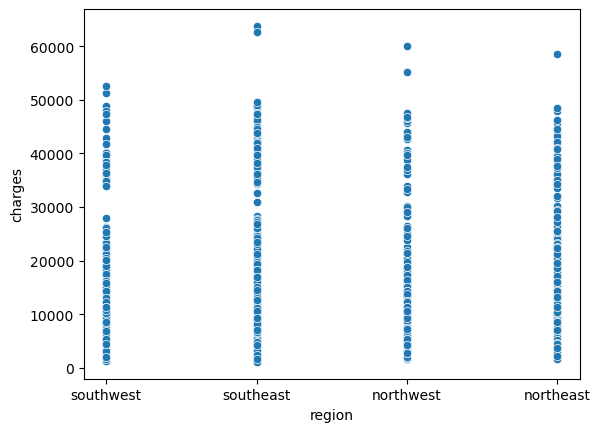

In [21]:
sns.scatterplot(x='region',y='charges', data=data)
plt.show()

**Insight** 
- show a similar pattern, with the southeast followed by northwest and north east having a few outliers paying a higher charge

## Multivariate Analaysis

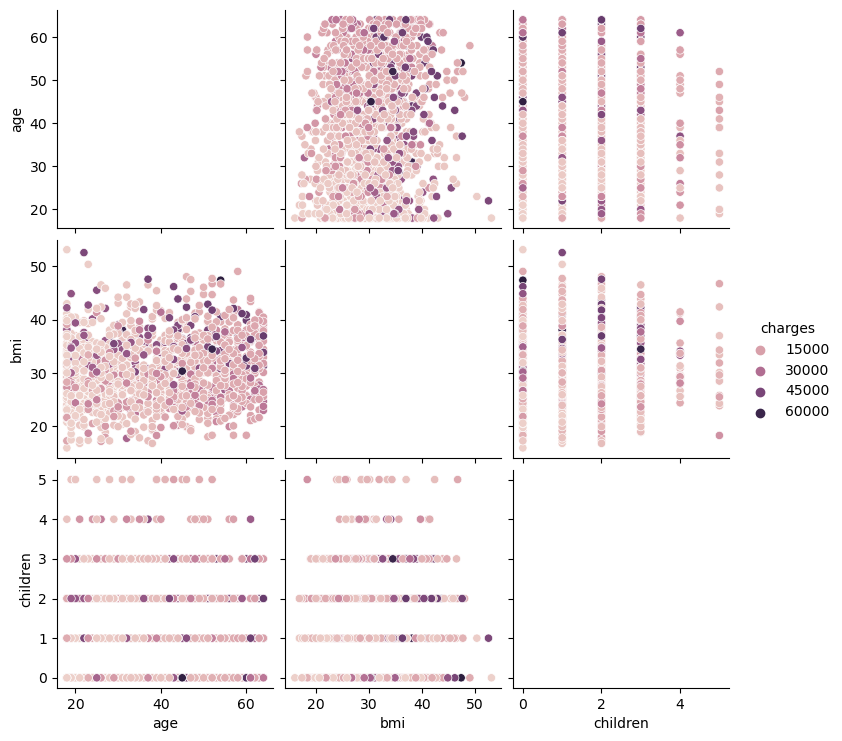

In [7]:
## Step 3 Multivariate Analysizing
sns.pairplot(data, hue='charges')
plt.show()

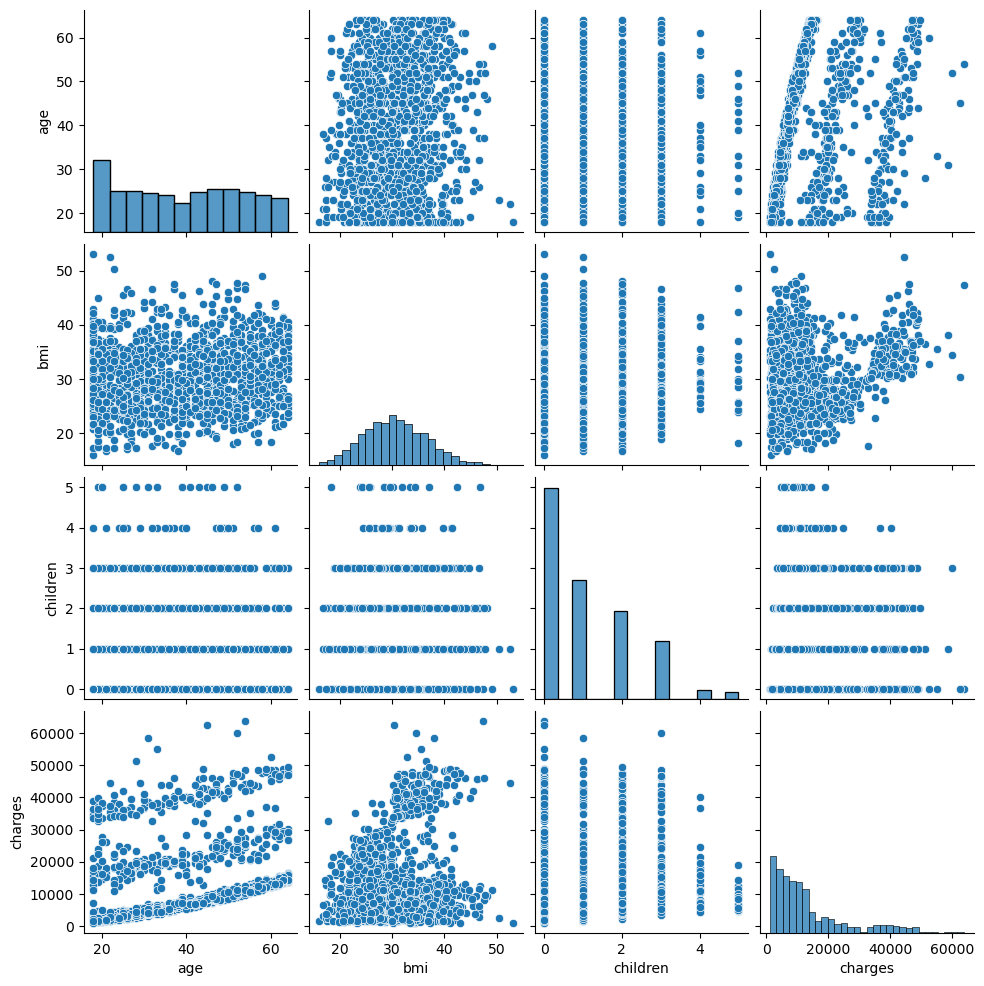

In [21]:
sns.pairplot(data)


**Insight**
- also a strong correlation between independant variables wold not be prefered as it would suggest that they are dependent on eachother

## Data Preprocessing and Feature Engineering

In [23]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.sex=pd.get_dummies(data.sex,drop_first=True)

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [7]:
data.smoker=pd.get_dummies(data.smoker,drop_first=True)

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lc = LabelEncoder()
data.region = lc.fit_transform(data.region)

In [118]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
from sklearn.preprocessing import LabelEncoder
print(data['region'].unique())
lc=LabelEncoder()
data.region=lc.fit_transform(data.region)

[3 2 1 0]


In [11]:
print(data['region'].unique())

[3 2 1 0]


In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [36]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


### 

<AxesSubplot:xlabel='age'>

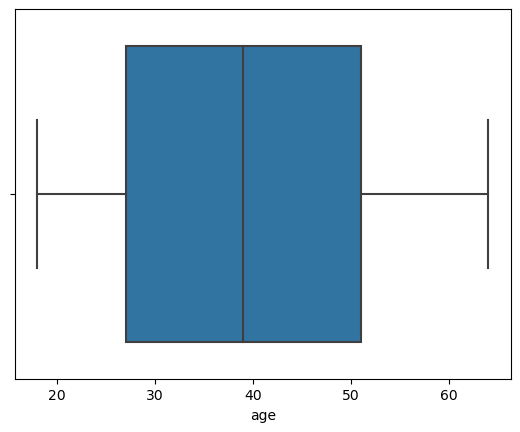

In [37]:
sns.boxplot(x='age', data=data)

<AxesSubplot:xlabel='sex'>

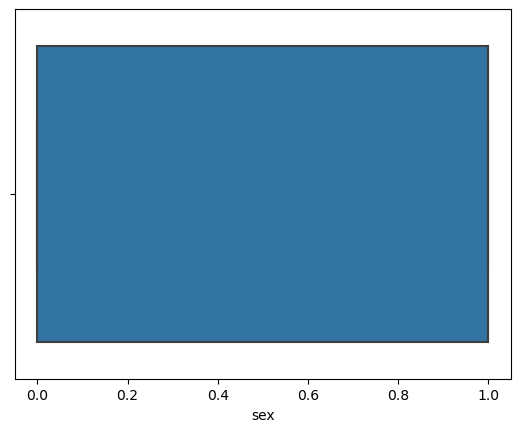

In [38]:
sns.boxplot(x='sex', data=data)

<AxesSubplot:xlabel='bmi'>

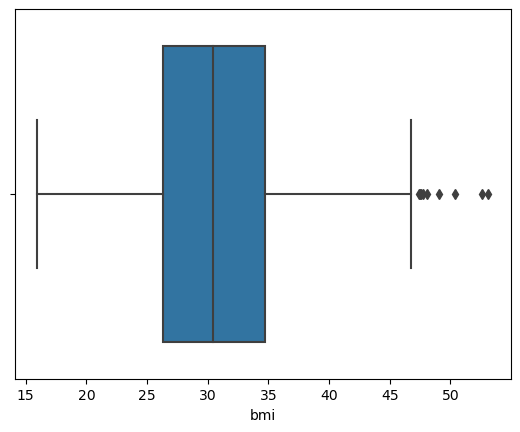

In [39]:
sns.boxplot(x='bmi', data=data)

**Insight** 
- There are some outliers in bmi

<AxesSubplot:xlabel='children'>

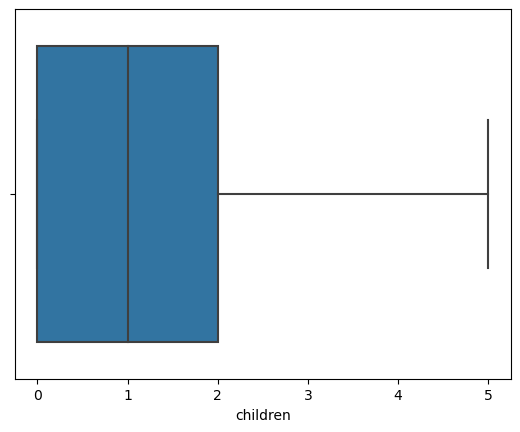

In [40]:
sns.boxplot(x='children', data=data)

<AxesSubplot:xlabel='smoker'>

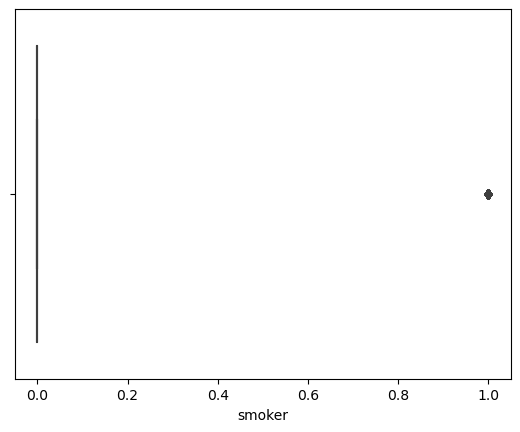

In [41]:
sns.boxplot(x='smoker', data=data)

<AxesSubplot:xlabel='region'>

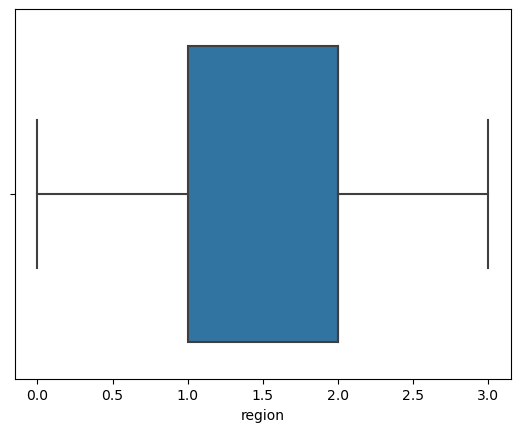

In [42]:
sns.boxplot(x='region', data=data)

In [12]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
scaler.fit_transform(data[['bmi']])

array([[0.3212268 ],
       [0.47914985],
       [0.45843422],
       ...,
       [0.56201238],
       [0.26472962],
       [0.35270379]])

In [36]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [13]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [14]:
data.drop('charges', axis =1).corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


<AxesSubplot:>

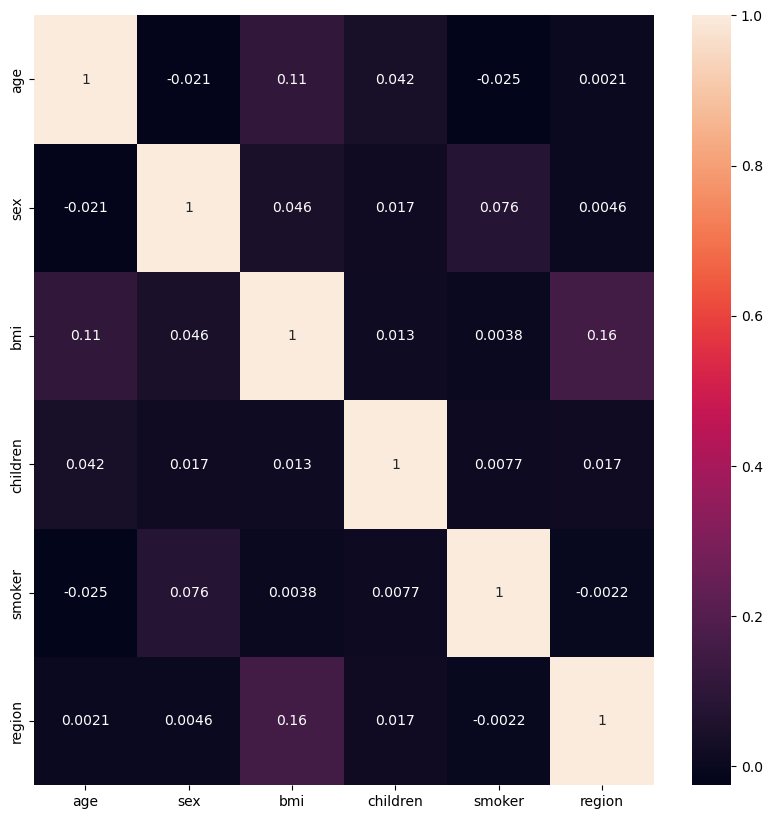

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(data.drop('charges', axis =1).corr(), annot = True)

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [44]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [15]:
data.duplicated().sum()

1

In [16]:
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print 
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges
581,19,1,30.59,0,0,1,1639.5631


In [17]:
display(data.drop_duplicates(inplace=True))

None

In [18]:
x=data[['age','sex','bmi','children','smoker','region']] ## X variable contains all inputs
y=data.charges ## y is output

In [42]:
print(y.shape)

(1337,)


In [130]:
print(x.shape)

(1337, 6)


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [52]:
y_train

127      9634.53800
578      9724.53000
385      1261.85900
1204    18223.45120
413      5080.09600
           ...     
360     10043.24900
710      1727.54000
439      2897.32350
174      2855.43755
1147     2261.56880
Name: charges, Length: 1069, dtype: float64

In [22]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [45]:
y_test # Actual values

727     16657.71745
260     11837.16000
903      8125.78450
566      6373.55735
777      7448.40395
           ...     
706     44400.40640
309      7749.15640
1184    18328.23810
1281    24535.69855
801     14313.84630
Name: charges, Length: 268, dtype: float64

In [46]:
y_predict # Values predicted by model

array([27655.27916004, 10724.34421374, 12481.78003935, 11829.34776878,
       13184.46936076,  2011.15902313, 15580.56755005, 32810.83785815,
       37037.41195825,  1959.35751859, 10392.10810962, 34494.91410531,
       26895.9341665 , 14056.6764921 , 17424.28525821, 41321.13215394,
       11684.22747508, 15851.11216224, 39293.37529593,  2700.38517977,
        3007.58360696, 15185.14136897,  8788.33119618,  3669.75424815,
        8803.41985174, 32644.97890492, 38016.18092755,  9001.91597479,
       32668.24579625, 10212.07994351,    61.17946941,  1774.90125935,
       13700.52084458,  4067.22257399,  9506.97931165,  1456.23560649,
       15799.22129719, 15616.59963578,  5119.48393877,  -399.61866747,
       14010.39262991, 10980.50293259,  6968.50830684, 31508.56007733,
        9289.13082138, 11926.53038092, 34362.58693514,  6236.24611509,
       13986.50640787, 13747.3204923 ,  6804.13190576,  3995.66745307,
       26414.37237216,  5877.64052489,  2618.28244435, 11806.75794176,
      

In [23]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [24]:
r2score

0.7244150380582826

In [26]:
X_test.shape

(268, 6)

In [27]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.72)*(268-6)/(268-6-1)
adjusted_r2

0.718927203065134

In [28]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

34608265.193358265
5882.878988501996


In [29]:
print(mean_absolute_error(y_test,y_predict))

4115.232200535403


## KNN Model 2

In [143]:
import pandas as pd
import numpy as np
#from sklearn.neighbors import KNeighborsClassifier # its for classification task
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
d = pd.read_csv(r'D:\DATA SCIENCE - Datamites\Projects\Data\Reg-insurance.csv')

In [3]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Cheking for null values
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
d.duplicated().sum()

1

In [16]:
display(d.drop_duplicates(inplace=True))

None

## Data preprocessing 

In [145]:
d.smoker=pd.get_dummies(d.smoker,drop_first=True)
d.sex=pd.get_dummies(d.sex,drop_first=True)

In [146]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
d.region=lc.fit_transform(d.region)

In [19]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


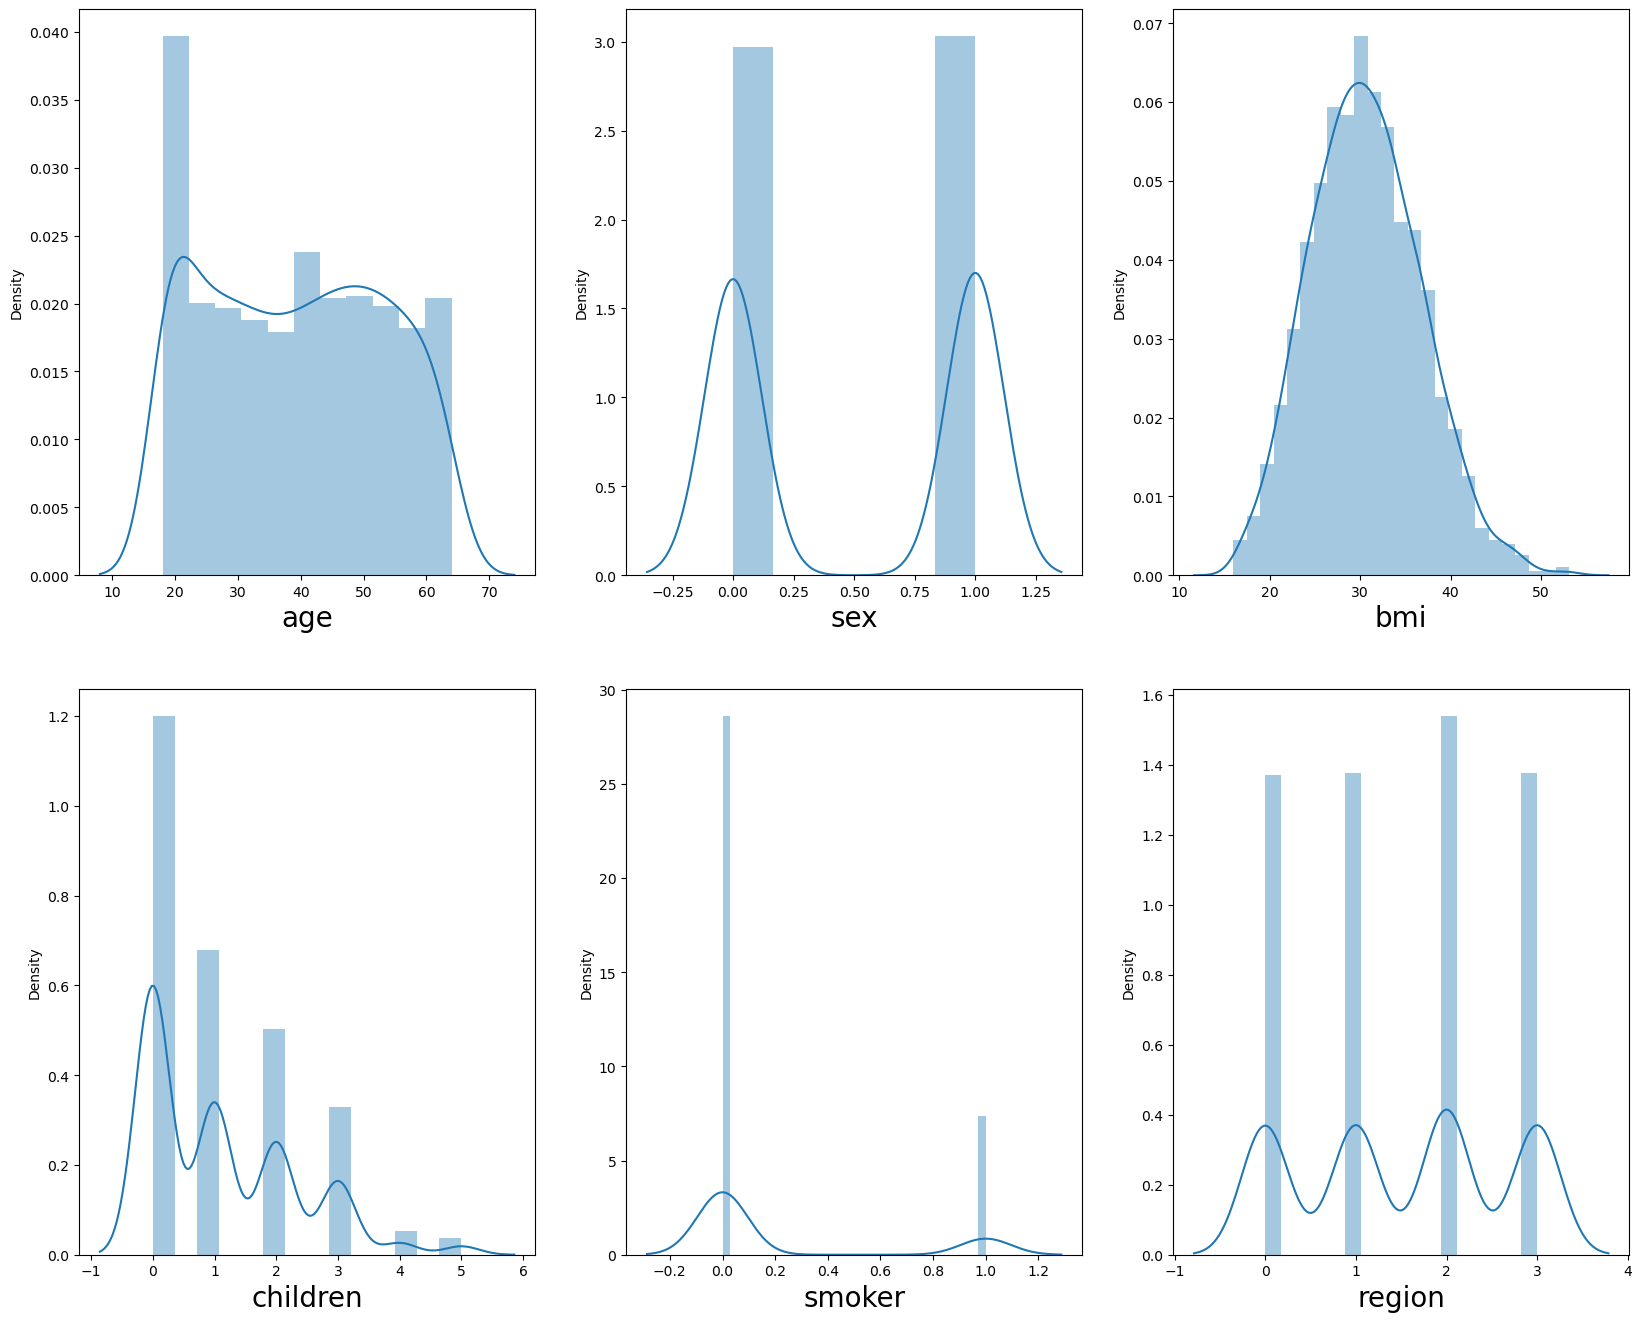

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(d[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

**Insight**
- Age:
- The x-axis ranges from 20 to 70, it indicates that the dataset contains individuals with ages between 20 and 70 years.
- No significant skewness and ages more or less evenly distributed
-Bmi:
- BMI is normal distribution (bell-shaped curve)
- The x-axis ranges from 20 to 50, it indicates that the dataset contains individuals with BMI values between 20 and 50.
- The distribution is approximately symmetric (no significant skewness).
- Children:
- The maximum number of children observed in a family is 5. Specifically, there are 18 families with 5 children each.
- In the Insurance Cost Prediction dataset, a total of 574 families have no children, meaning they do not have any dependent - children included in their insurance policy.
- Smoker:
- non-smokers in our sample are higher than smokers by a high margin
- Region:
- The distribution of individuals across regions gives an idea of the geographic spread of the insured population
- The high count in the "southeast" region indicates that more individuals from this region have participated in the insurance program.
- The "southeast" region has the highest number of individuals (364), while the other three regions, "northwest," "southwest," and "northeast," have a similar count (around 324-325 each).
- Charges:
- In this case, the right-skewed distribution suggests that most individuals have relatively lower charges, while a smaller proportion of individuals may have significantly higher charges.

## Model Creation

In [147]:
    ### Split X and Y
X = d.drop(columns = ['charges']) # Independent variables
y = d['charges'] # Dependent or target varaible.

In [148]:
import numpy as np

# Convert continuous variable to array
array_variableknn = np.array(y)

# Print the original and array variables
#print("Continuous Variable:", continuous_variable)
print("Array Variable:", array_variableknn)


# Set a threshold value
threshold = np.median(array_variableknn)  ##9382.033
###  13270.4222

# Convert continuous variable into categorical based on the threshold
categorical_variableknn = np.where(y < threshold, 'Low', 'High')
# Print the original and categorical variables
print("Categorical Variable:", categorical_variableknn)

Array Variable: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
Categorical Variable: ['High' 'Low' 'Low' ... 'Low' 'Low' 'High']


In [23]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [24]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [149]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [150]:
print(X_scaled.shape)
print(y.shape)

(1338, 6)
(1338,)


In [151]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=40)

In [152]:
# let's fit the data into KNN model and see how well it performs:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , 'is:', error)

RMSE value for k=  is: 6460.917555247687
RMSE value for k=  is: 5753.730461912906
RMSE value for k=  is: 5481.137595352963
RMSE value for k=  is: 5495.135722701813
RMSE value for k=  is: 5292.762943913506
RMSE value for k=  is: 5271.802764117494
RMSE value for k=  is: 5207.810304473754
RMSE value for k=  is: 5163.382131657114
RMSE value for k=  is: 5179.237137879643
RMSE value for k=  is: 5264.1484229980915
RMSE value for k=  is: 5263.9940161692875
RMSE value for k=  is: 5293.167290262466
RMSE value for k=  is: 5279.959364160539
RMSE value for k=  is: 5260.840047755317
RMSE value for k=  is: 5266.75111134116
RMSE value for k=  is: 5313.233606457504
RMSE value for k=  is: 5308.6871598612315
RMSE value for k=  is: 5331.997304654443
RMSE value for k=  is: 5316.851824787278
RMSE value for k=  is: 5330.074226933863


<AxesSubplot:>

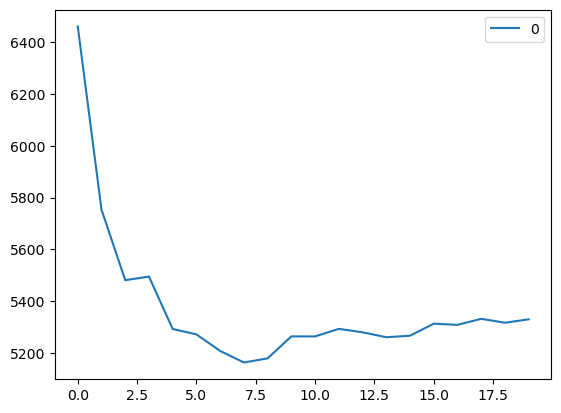

In [153]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [154]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [155]:
# Predict 
y_pred = knn.predict(X_test)

## Evaluation for Regression

In [156]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [157]:
r2score

0.7868256130879493

In [158]:
X_test.shape

(335, 6)

In [159]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.78)*(335-1)/(335-6-1)
adjusted_r2

0.7759756097560976

In [47]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error
print(mean_absolute_error(y_test,y_pred))

30196516.610913586
5495.135722701813
3475.507003835821


In [48]:
print(mean_absolute_error(y_test,y_pred))

3475.507003835821


 ## Not using SMOT because its a regression task  (SMOT is for classification task)

## Decision Tree Model 3

In [160]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
d1 = pd.read_csv(r'D:\DATA SCIENCE - Datamites\Projects\Data\Reg-insurance.csv')

In [95]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
d1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [162]:
d1.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [98]:
d1.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
d1.describe(include=['O'])#It will give you info about categorical data/columns

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [100]:
d1.info()#To check  data type and  null value of all columns  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [101]:
d1.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


## EDA
### Univatiate Analysis

In [136]:
## Univariate Analysis
!pip install sweetviz

In [11]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(d1)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from univariant analysis

* The age of Policy holders age lie between 20 - 63.
* The male Population is higher than female people by 1% .
* The median BMI for insurance policy holders lie at 30.4 .
* More than 40% people do not have children. and less that 5% people have more than 3 childrens.
* almost 80%  policy holders are non smokers and 20% are smokers.
* Policy holders from the southeast region are higher in numbers than other 3.
* The Minimum value charge of policy  is 1122 And the number of policy holders is up to 40%
* The Maximum value Charge of policy is 63770 and the number of policy holders is less than 1%

## Bivariate Analysis

In [102]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [163]:
categorical_col = []#list
for column in d1.columns:#for loop to acess columns form dataset
    if d1[column].dtype == object and len(d1[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {d1[column].unique()}")#output
        print("====================================")

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


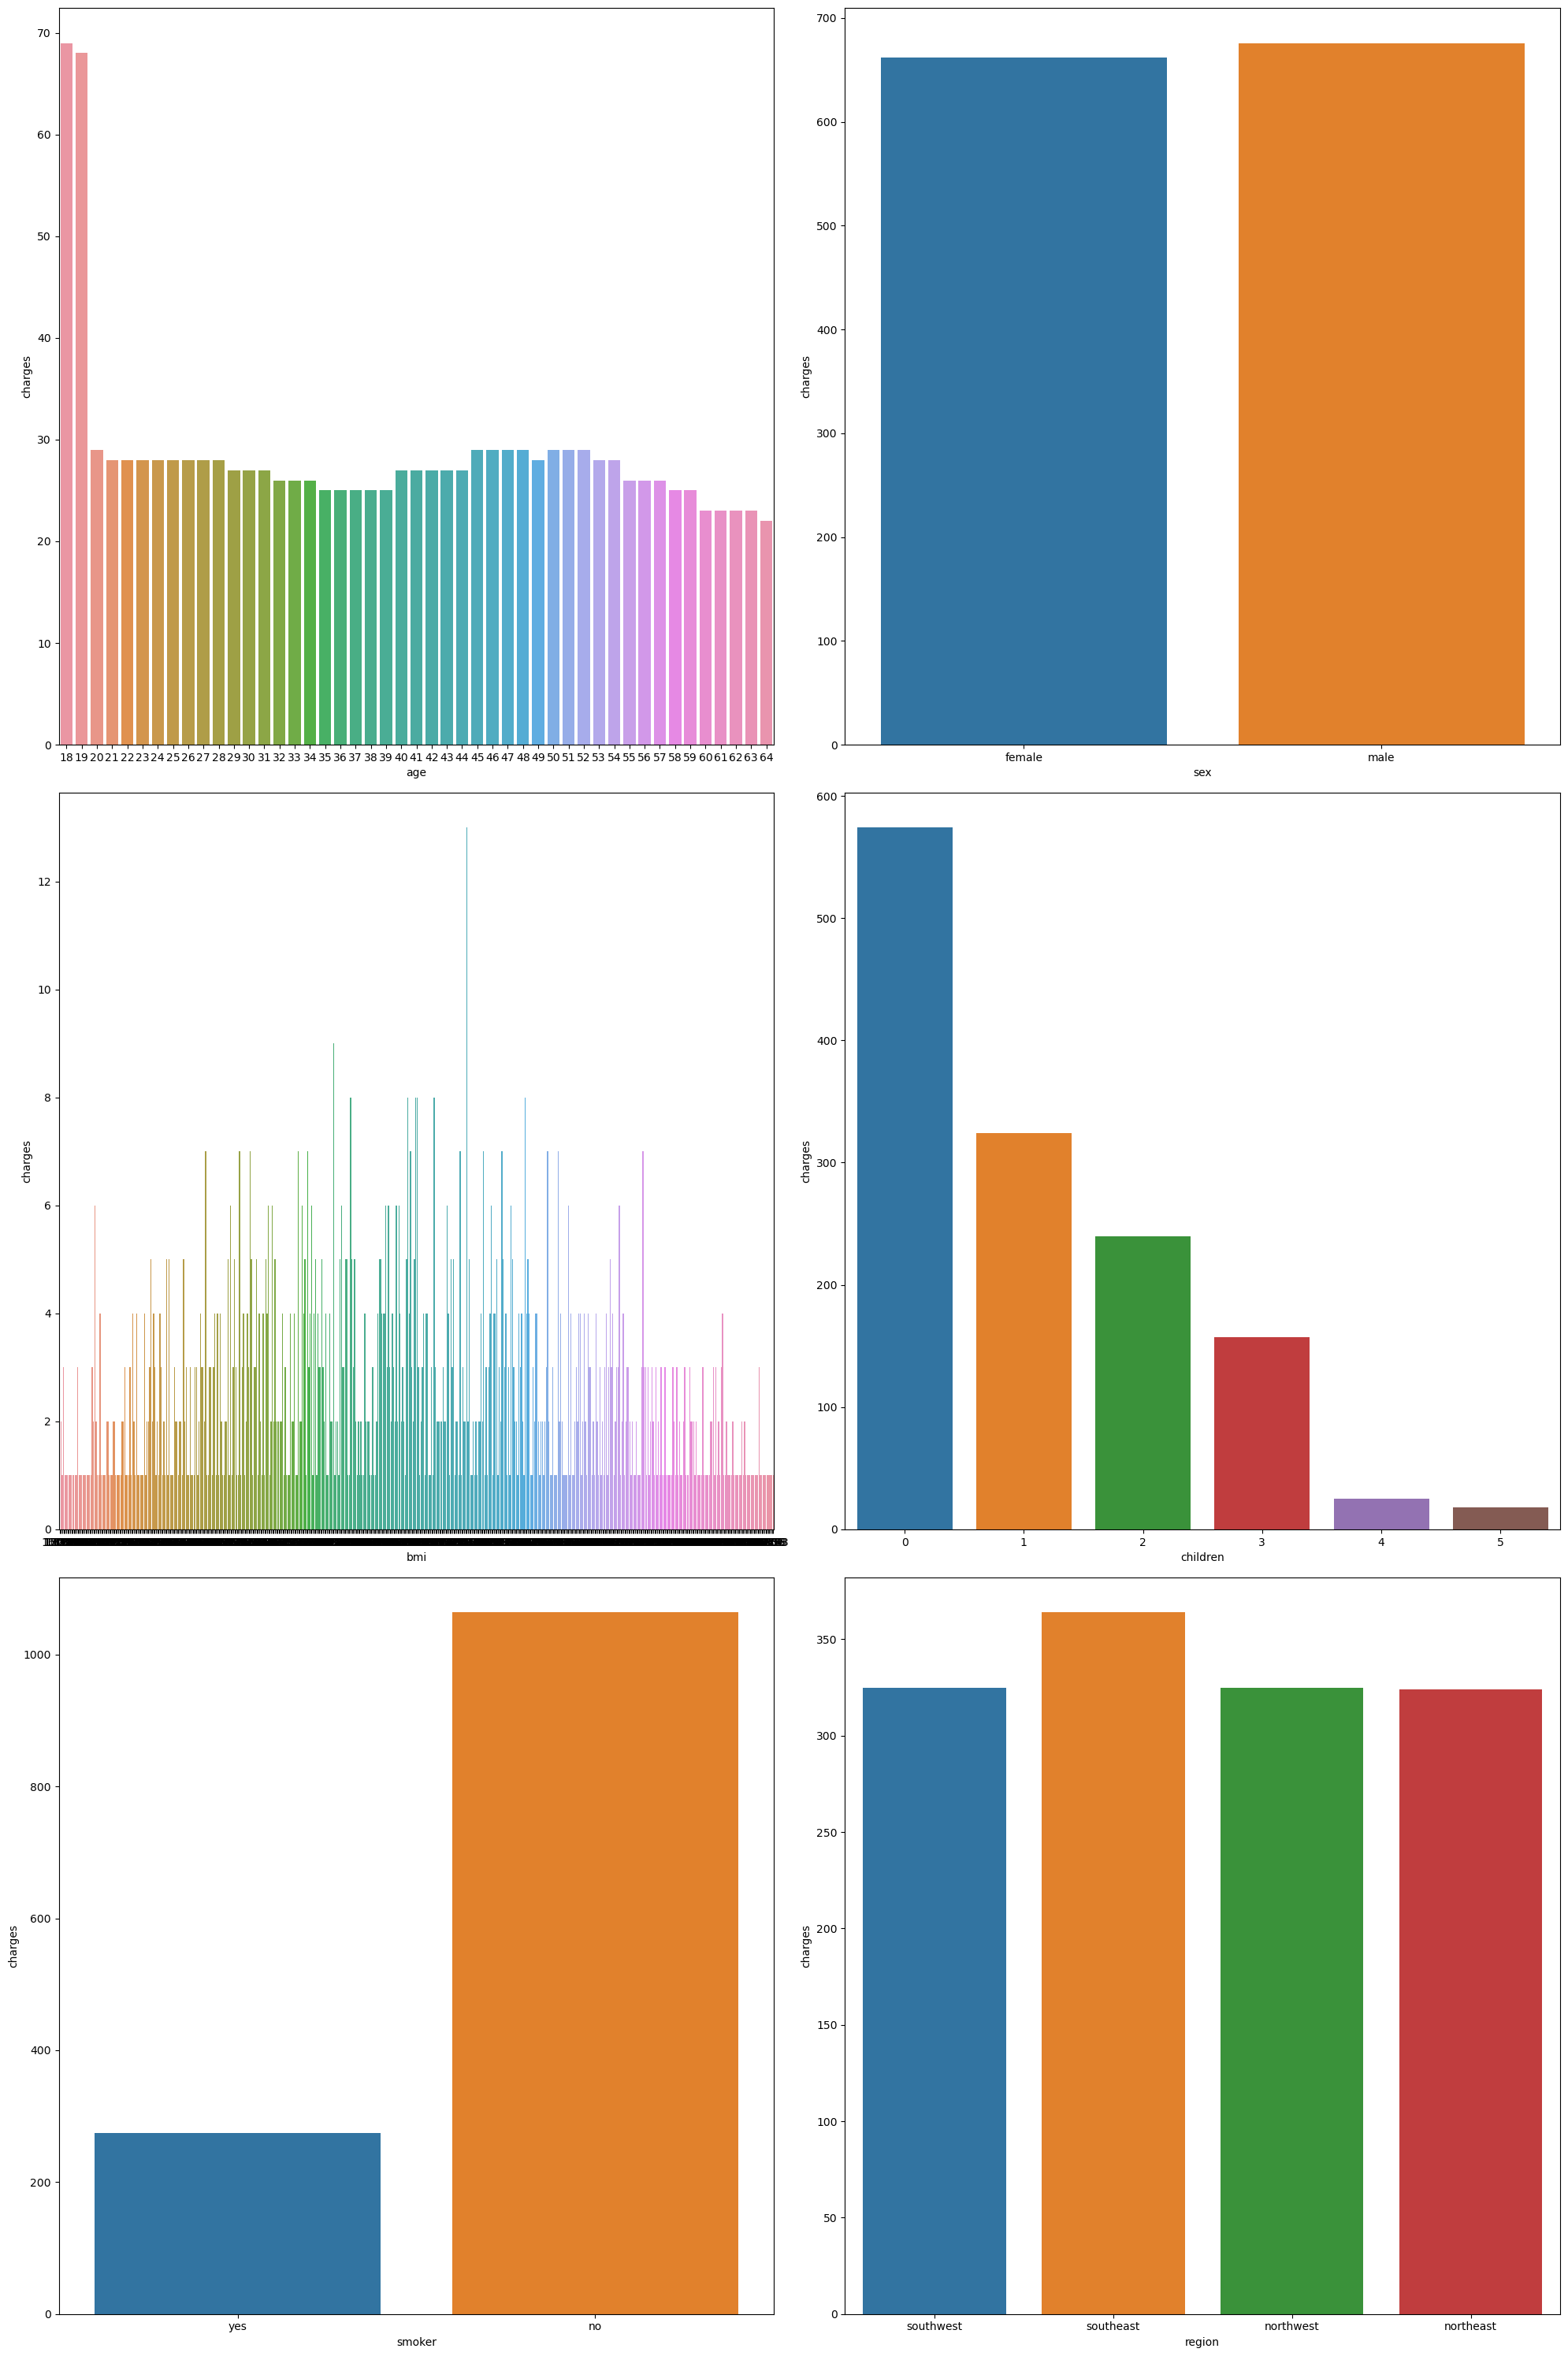

In [104]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(20,30), facecolor='white')#canvas size
plotnumber = 1 #count variable

for column in d1:#for loop to acess columns form data1
    if plotnumber<=6 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3,2,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=d1[column].dropna(axis=0))#plotting count plot
        plt.xlabel(column,fontsize=10)#assigning name to x-axis and increasing it's font 
        plt.ylabel('charges',fontsize=10)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter
plt.tight_layout()

## Insights from bivariant analysis
* Male policy holders are charged slighlty higher than female policy holders
* The graph shows that the charges accumulated from non smokers is higher (this is probably beacuse the non-smoker population in the data is higher)
* The accumulation of charges for the south east region is higher.


In [164]:
numerical_col = []#list for continous columns
for column in d1.columns:#acessing columns from datasets
    if d1[column].dtype == int and len(d1[column].unique()) >= 10: #checking whether it's datatype is int and count of unique label greater than 10  
        numerical_col.append(column) # inserting those columns in list                                      
        

In [165]:
numerical_col#printing list which contain continous columns

[]

## Discrete data

In [54]:
d12=d1[['age','children']]

In [108]:
d12

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


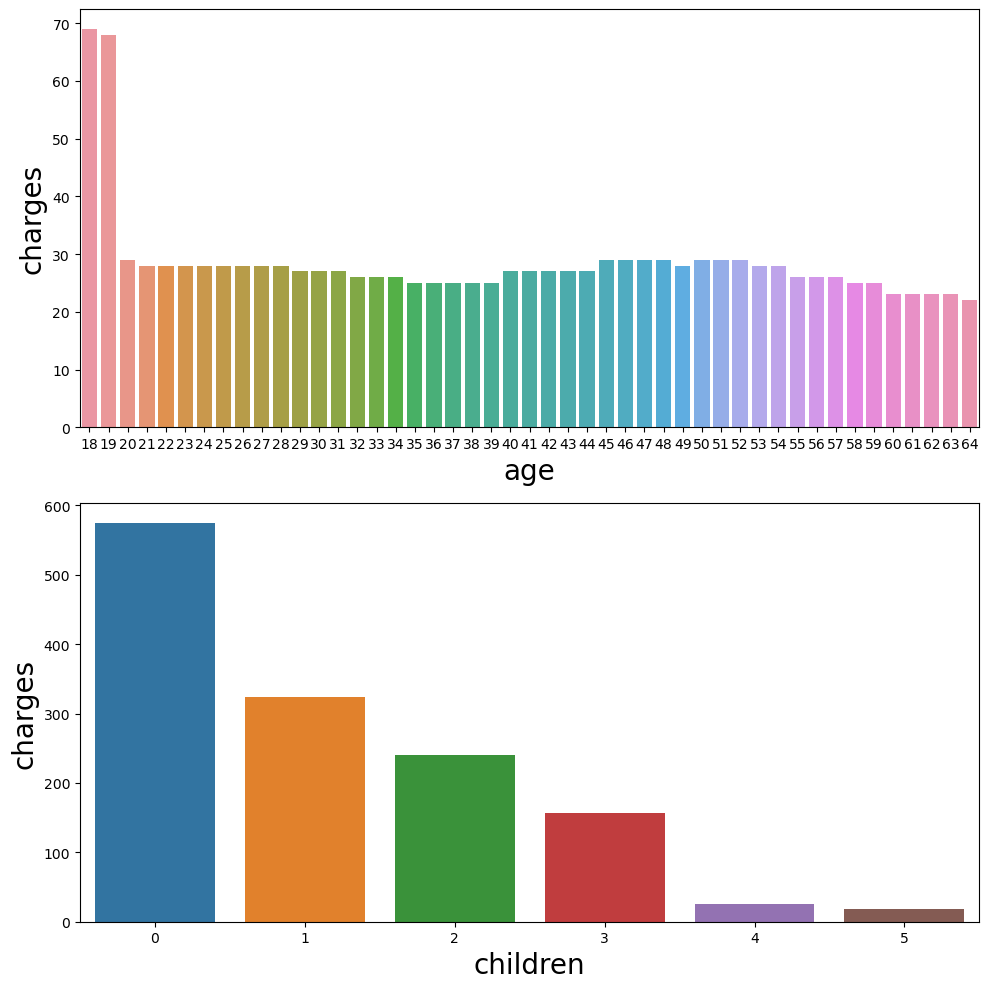

In [109]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1

for column in d12:
    if plotnumber<=16 :
        ax = plt.subplot(2,1,plotnumber)
        sns.countplot(x=d12[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insight for Discrete 
* Younger policy holders are charged higher rates as compared to the older populaion.
* People with no children are charged higher than people with more number of children(The graph is a descinding graph)

## Bivariant analysis of continuous variables

In [110]:
d13=d1[['bmi']]

In [111]:
d13

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


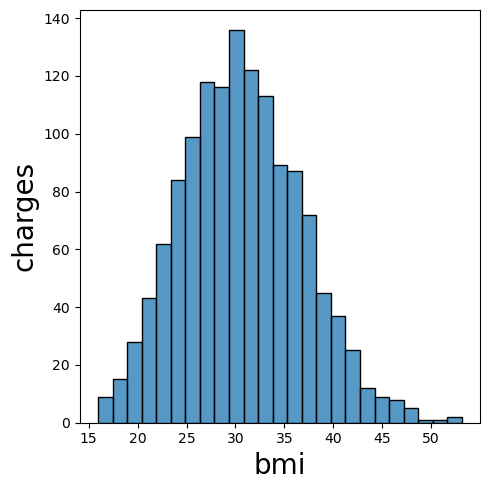

In [112]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(5,5), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in d13:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(1,1,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=d13[column].dropna(axis=0)) # plotting hist plot and dropping null values,classification according to target
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('charges',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

## Insight for Discrete Bivariate Analysis
* median of bmi is paying more( the graph is skewed)

## Final Conclution
Age -The age of Policy holders lies between 20 - 63.

Sex -The male Population is higher than female population by 1%

BMI -The median BMI for insurance policy holders lies at 30.4

Children - More than 40% people do not have children and less than 5% people have more than 3 childrens.

Smoker -Almost 80% policy holders are non smokers and 20% are smokers.

Region - Policy holders from the southeast region are slightly higher in number.

## Data Preprocessing

### Checking missing values/null values

In [166]:
d1.isnull().sum()#null value checking 
# no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## # Conversion of  Categorical variables

### sex

In [167]:
d1.sex.unique()

array(['female', 'male'], dtype=object)

In [168]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has quited the job so let do the
##manual encoding
d1.sex=d1.sex.map({'female':0,'male':1})


In [116]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [58]:
d1.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

 ### smoker

In [169]:
d1.smoker.unique()

array(['yes', 'no'], dtype=object)

In [170]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has quited the job so let do the
##manual encoding
d1.smoker=d1.smoker.map({'no':0,'yes':1})


In [120]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [61]:
d1.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

### region

In [171]:
d1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [172]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has quited the job so let do the
##manual encoding
d1.region=d1.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})


In [124]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [125]:
d1.region.value_counts()

1    364
0    325
2    325
3    324
Name: region, dtype: int64

## Feature Selection

<AxesSubplot:>

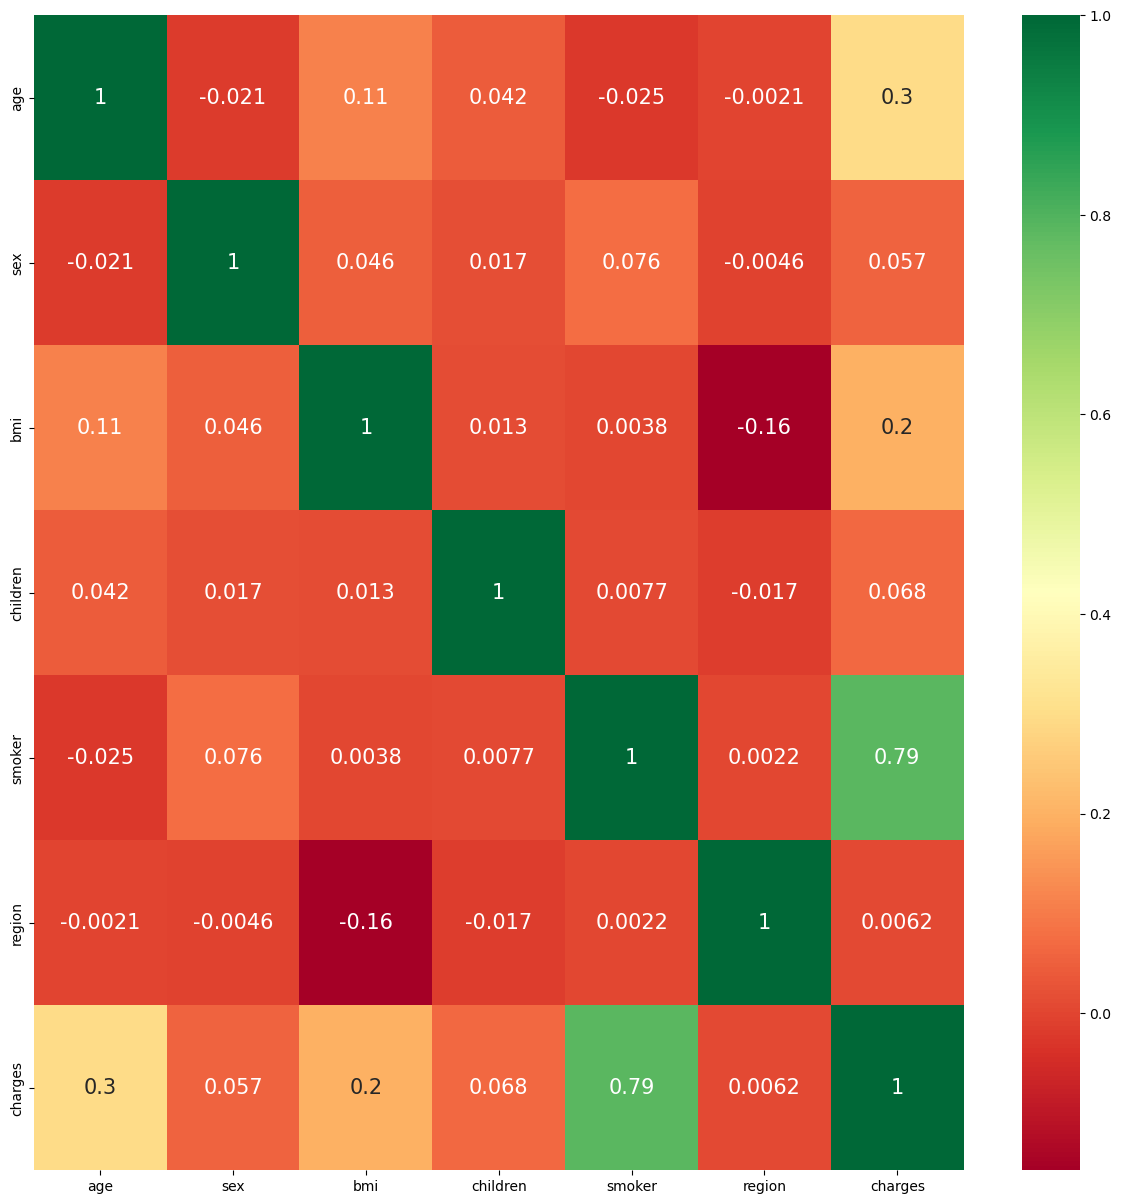

In [126]:
## Checking correlation

plt.figure(figsize=(15,15))#canvas size
sns.heatmap(d1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

## Model Creation

In [173]:
## Creating independent and dependent variable
X = d1.drop('charges', axis=1)#independent variable 
y = d1.charges #dependent variable 

In [128]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [129]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [174]:
d1["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
#from sklearn.utils import shuffle

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#train_data = pd.concat([X_train, y_train], axis=1)
#train_data = shuffle(train_data, random_state=42)
#class_distribution = train_data.iloc[:, -1].value_counts()

In [81]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [133]:
d1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [134]:
y.unique

<bound method Series.unique of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [177]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [178]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([28340.18885,  5469.0066 , 28950.4692 ,  9500.57305, 33732.6867 ,
       11326.71487,  2128.43105, 14313.8463 ,  2680.9493 ,  9249.4952 ,
       19361.9988 ,  6600.361  ,  3956.07145, 46200.9851 , 48173.361  ,
       48885.13561, 10118.424  , 41676.0811 , 10702.6424 , 21348.706  ,
        5615.369  ,  8522.003  ,  1253.936  ,  2741.948  , 10493.9458 ,
       10338.9316 , 12648.7034 ,  4618.0799 ,  9447.25035,  1135.9407 ,
        7682.67   , 11840.77505,  2026.9741 ,  5425.02335,  2902.9065 ,
        8733.22925,  2331.519  ,  7633.7206 , 22218.1149 , 37742.5757 ,
       18838.70366,  2639.0429 , 10976.24575, 12142.5786 ,  5989.52365,
       12913.9924 ,  4830.63   ,  5615.369  , 40273.6455 ,  4673.3922 ,
       13981.85035,  2801.2588 ,  6393.60345,  1708.0014 , 10976.24575,
       10600.5483 ,  3736.4647 , 39983.42595, 12231.6136 , 29186.48236,
       13393.756  ,  4949.7587 , 16085.1275 ,  7201.70085,  9722.7695 ,
       12609.88702, 16232.847  ,  8782.469  ,  3176.8159 ,  1526

In [179]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([ 2352.96845,  4340.4409 ,  9391.346  , ..., 11931.12525,
       46113.511  , 10214.636  ])

In [180]:
# Predict 
y_pred = dt.predict(X_test)

In [181]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [182]:
r2score

0.7206380496667082

In [183]:
X_test.shape

(335, 6)

In [184]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.71)*(335-1)/(335-6-1)
adjusted_r2

0.7046951219512194

In [185]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

42153243.07588036
6492.552893575867


In [186]:
print(mean_absolute_error(y_test,y_pred))

2890.0864961164175


## Hyperparameter Tuning

In [187]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [188]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":["mse"], #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'})


In [189]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'mse', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})

In [190]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'splitter': 'best'}

In [191]:
tree_cv.best_score_#getting best score form cv

0.8439302142108112

In [192]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing best parameter to decision tree

In [193]:
dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeRegressor(criterion='mse', max_depth=15, min_samples_split=3,
                      splitter='random')

In [194]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([ 9704.66805   ,  5266.3656    , 28950.4692    ,  8944.1151    ,
       34303.1672    , 11326.71487   ,  2128.43105   , 14402.745     ,
        3943.5954    , 10269.46      , 17429.03605   ,  7265.7025    ,
        4150.38235   , 45702.02235   , 48173.361     , 41943.60965   ,
       10263.847875  , 41886.63335   ,  7742.1098    , 21348.706     ,
        5662.118     , 18806.14547   ,  1253.936     ,  2820.718675  ,
       10493.9458    , 11286.5387    , 12643.4492    , 11728.39178   ,
       10043.249     ,  1136.17005   ,  7465.3945    , 11648.027525  ,
        2091.86295   ,  5138.2567    ,  2190.8675    ,  8604.153525  ,
        2585.269     ,  7050.642     , 22218.1149    , 39822.9903    ,
        5662.118     ,  2707.117525  , 11565.1768    , 12226.775075  ,
        4672.0161    , 12921.39175   , 19442.3535    ,  3906.127     ,
       41943.60965   ,  4672.0161    , 13887.9685    ,  1718.28955   ,
        6498.56095   ,  1708.0014    , 10976.24575   , 20442.59562   ,
      

In [195]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [196]:
r2score


0.7206380496667082

In [197]:
X_test.shape

(335, 6)

In [198]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.71)*(335-1)/(335-6-1)


In [199]:
adjusted_r2

0.7046951219512194

In [90]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error
print(mean_absolute_error(y_test,y_pred))

43588292.19806936
6602.143000425646
2941.396826295522


In [159]:
print(mean_absolute_error(y_test,y_pred))

2853.449392474627


## Random Forest Model 4

In [200]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_reg = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_reg.fit(X_train,y_train)#training the data

RandomForestRegressor()

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
RandomForestRegressor()

RandomForestRegressor()

In [203]:
y_predict=rf_reg.predict(X_test)#testing

In [204]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [205]:
r2score

0.8532242515558333

In [206]:
X_test.shape

(335, 6)

In [207]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)

In [208]:
adjusted_r2

0.8472560975609755

In [209]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

22147159.963730805
4706.076918594808


In [210]:
print(mean_absolute_error(y_test,y_predict))

2529.880478174105


## Hyperparameter Tuning

In [211]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors
rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True})


In [212]:
rf_clf2 = RandomForestRegressor(rf_best_params['n_estimators'])#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing


In [213]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [214]:
r2score

0.8505955500775869

In [215]:
X_test.shape

(335, 6)

In [216]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2

0.8472560975609755

In [108]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

22378054.68339522
4730.544861154497


In [202]:
print(mean_absolute_error(y_test,y_predict))

2533.2205165046826


## Gradient Boost Model 5

In [217]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [218]:
d3 = pd.read_csv(r'D:\DATA SCIENCE - Datamites\Projects\Data\Reg-insurance.csv')

In [85]:
d3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing

In [219]:
d3.isnull().sum() # check for null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Conversion of categorical columns in to numerical columns


## sex

In [220]:
from sklearn.preprocessing import LabelEncoder

In [221]:
lb=LabelEncoder()
d3.sex=lb.fit_transform(d3['sex'])

In [5]:
d3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


## smoker

In [222]:
lb=LabelEncoder()
d3.smoker=lb.fit_transform(d3['smoker'])

In [7]:
d3

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


## region

In [223]:
lb=LabelEncoder()
d3.region=lb.fit_transform(d3['region'])

In [9]:
d3

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [224]:
## Creating independent and dependent variable
X = d3.drop('charges', axis=1)#independent variable 
y = d3.charges #dependent variable 

In [11]:
d3

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Model Creation

In [225]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [226]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [227]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_gbm)

In [228]:
r2score

0.8567807207327476

In [17]:
X_test.shape

(335, 6)

In [120]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2

0.8472560975609755

In [121]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

306028361.94482356
17493.666337987117


In [122]:
print(mean_absolute_error(y_test,y_predict))

12428.520333903462


In [229]:
## Installing XGB library
!pip3 install xgboost

In [230]:
import xgboost 

In [220]:
y_train

868     13129.60345
471      2203.47185
16      10797.33620
1037    39725.51805
109     47055.53210
           ...     
789     13457.96080
256     43921.18370
968      3279.86855
952      4527.18295
1273     4747.05290
Name: charges, Length: 1003, dtype: float64

In [231]:
## model creation
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

## Hyper parameter tunning in XG bost 


In [232]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='neg_mean_squared_error',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 200, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 51.2})


In [233]:
XGB2=XGBRegressor(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing


In [234]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [235]:
r2score

0.8551786997351498

In [236]:
X_test.shape

(335, 6)

In [237]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2

0.8472560975609755

In [132]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

20356622.71495656
4511.831414731335


In [133]:
print(mean_absolute_error(y_test,y_predict))

2476.6330348171523


In [136]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


## Comparison Table

In [241]:
from prettytable import PrettyTable

models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores = [4115.232200535403, 3475.507003835821, 2941.396826295522, 2533.2205165046826, 2476.6330348171523]
mse_scores = [34608265.193358265, 30196516.610913586, 43588292.19806936, 22378054.68339522, 20356622.71495656]
rmse_scores = [5882.878988501996, 5495.135722701813, 6602.143000425646, 4730.544861154497, 4511.831414731335]
adj_r2_scores = [0.718927203065134, 0.7759756097560976, 0.7046951219512194, 0.8472560975609755, 0.8472560975609755]
r2_scores = [0.72, 0.78, 0.71, 0.85, 0.85]

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Model", "MAE", "MSE", "RMSE", "Adj R2", "R2"]

# Add the data rows to the table
for model, mae, mse, rmse, adj_r2, r2 in zip(models, mae_scores, mse_scores, rmse_scores, adj_r2_scores, r2_scores):
    table.add_row([model, mae, mse, rmse, adj_r2, r2])

# Print the table
print(table)


+-------------------+--------------------+--------------------+-------------------+--------------------+------+
|       Model       |        MAE         |        MSE         |        RMSE       |       Adj R2       |  R2  |
+-------------------+--------------------+--------------------+-------------------+--------------------+------+
| Linear Regression | 4115.232200535403  | 34608265.193358265 | 5882.878988501996 | 0.718927203065134  | 0.72 |
|        KNN        | 3475.507003835821  | 30196516.610913586 | 5495.135722701813 | 0.7759756097560976 | 0.78 |
|   Decision Tree   | 2941.396826295522  | 43588292.19806936  | 6602.143000425646 | 0.7046951219512194 | 0.71 |
|   Random Forest   | 2533.2205165046826 | 22378054.68339522  | 4730.544861154497 | 0.8472560975609755 | 0.85 |
|      XGBoost      | 2476.6330348171523 | 20356622.71495656  | 4511.831414731335 | 0.8472560975609755 | 0.85 |
+-------------------+--------------------+--------------------+-------------------+--------------------+

## Model Comparison Report

From the table of model evaluation metrics, we can draw several insights and comparisons of the different machine learning models used for Insurance Cost Prediction:
- **Model Performance:** The table presents the performance metrics for five different machine learning models: Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Gradient Boosting.


- **MAE (Mean Absolute Error):** Lower MAE values indicate better model performance. The "Gradient Boost" model achieved the lowest MAE of 2476.63, indicating that it predicts insurance costs with the least average absolute difference from the actual values.


- **MSE (Mean Squared Error): Lower MSE values indicate better accuracy. Again, the "Gradient Boost" model performed the best with the lowest MSE of 2013.818, indicating its superior predictive accuracy.


- **RMSE (Root Mean Squared Error):** RMSE is a measure of the model's error, and lower values are preferred. The "Gradient Boost" model had the lowest RMSE of 4511.83, making it the most precise model in estimating insurance charges.


- **R-squared (R2):** R-squared represents the proportion of variance in the target variable (insurance charges) that is explained by the model. Higher R2 values are desirable, as they indicate a better fit to the data. The "Gradient Boost" model achieved the highest R2 of 0.8567, implying that approximately 85.67% of the variance in insurance charges is explained by this model.


- **Adjusted R-squared (Adj_R2):** Adjusted R-squared adjusts for the number of predictors in the model and is more suitable for comparing models with different numbers of features. The "Gradient Boost" model, along with "KNN" and "Random Forest," achieved the highest Adj_R2 of 0.8472.


- **Best Performing Model: The "Gradient Boost" model consistently performed the best across all evaluation metrics, making it the top-performing model for this Insurance Cost Prediction task.**


- **Model Selection:** When selecting the best model for deployment, one should consider not only the performance metrics but also the model's complexity, interpretability, and computational cost. The "Gradient Boost" model is a strong candidate due to its top-notch performance, but other factors should also be considered in the decision-making process.


- Overall, the table provides a concise summary of the model evaluation results, enabling an informed choice of the most suitable model for predicting insurance costs. It also highlights the strengths and weaknesses of each model, guiding further improvements and fine-tuning of the selected model.


## Report on Challenges faced
We initially faced some difficulty in plotting the elbow curve to determine the optimal number of clusters for K-means clustering. However,we sought guidance and learned the appropriate steps to create the curve. This visualization helped us in selecting the optimal number of clusters for ou K-means algorithm, improving the accuracy and effectiveness of the clustering process.


We were not sure about the most effective way to present the different model evaluation scores in a compare and contrast manner. However, we were  introduced to the 'prettytable' library, which turned out to be incredibly helpful. With the 'prettytable' library,we were able to create a well-organized and visually appealing table that showcased the various model metrics side by side. This made it easier to compare the performance of different machine learning models and draw insights from their respective scores.

**Despite the challenges, the project's successful completion was achieved through a collaborative effort and continuous learning; It was an opportunity to enhance our skills and foster a deeper understanding of the data science process. Moving forward, these experiences will serve as valuable lessons for tackling similar data analysis projects in the future.**